In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import json

In [3]:
with open(r'/content/drive/MyDrive/Master of Science in Machine Learning & AI/Masters_research_project/intents.json') as f:
    data = json.load(f)

conversational_data = pd.DataFrame(data['intents'])
conversational_data.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."


In [4]:
conversational_data.shape

(80, 3)

In [5]:
conversational_data.iloc[0]['patterns']

['Hi',
 'Hey',
 'Is anyone there?',
 'Hi there',
 'Hello',
 'Hey there',
 'Howdy',
 'Hola',
 'Bonjour',
 'Konnichiwa',
 'Guten tag',
 'Ola']

In [6]:
conversational_data.iloc[0]['responses']

['Hello there. Tell me how are you feeling today?',
 'Hi there. What brings you here today?',
 'Hi there. How are you feeling today?',
 'Great to see you. How do you feel currently?',
 "Hello there. Glad to see you're back. What's going on in your world right now?"]

In [7]:
conversational_data.iloc[1]['patterns']

['Good morning']

In [8]:
conversational_data.iloc[1]['responses']

["Good morning. I hope you had a good night's sleep. How are you feeling today? "]

In [9]:
conversational_data.iloc[5]['patterns']

['Bye',
 'See you later',
 'Goodbye',
 'Au revoir',
 'Sayonara',
 'ok bye',
 'Bye then',
 'Fare thee well']

In [10]:
conversational_data.iloc[5]['responses']

['See you later.',
 'Have a nice day.',
 'Bye! Come back again.',
 "I'll see you soon."]

In [11]:
conversational_data.iloc[10]['patterns']

['What can you do?']

In [12]:
conversational_data.iloc[10]['responses']

["I can provide general advice regarding anxiety and depression, answer questions related to mental health and make daily conversations. Do not consider me as a subsitute for an actual mental healthcare worker. Please seek help if you don't feel satisfied with me."]

In [13]:
conversational_data.shape

(80, 3)

In [14]:
conversational_data.head(10)

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
5,goodbye,"[Bye, See you later, Goodbye, Au revoir, Sayon...","[See you later., Have a nice day., Bye! Come b..."
6,thanks,"[Thanks, Thank you, That's helpful, Thanks for...","[Happy to help!, Any time!, My pleasure, You'r..."
7,no-response,[],"[Sorry, I didn't understand you., Please go on..."
8,neutral-response,[nothing much],[Oh I see. Do you want to talk about something?]
9,about,"[Who are you?, What are you?, Who you are?, Te...","[I'm Pandora, your Personal Therapeutic AI Ass..."


In [15]:
conversational_data1 = conversational_data.explode('patterns', ignore_index = True)
conversational_data1.head()

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...


In [16]:
conversational_data1.shape

(232, 3)

In [17]:
conversational_data = conversational_data1.explode('responses', ignore_index = True)
conversational_data.shape

(661, 3)

In [18]:
conversational_data.head(20)

,tag,patterns,responses
0,greeting,Hi,Hello there. Tell me how are you feeling today?
1,greeting,Hi,Hi there. What brings you here today?
2,greeting,Hi,Hi there. How are you feeling today?
3,greeting,Hi,Great to see you. How do you feel currently?
4,greeting,Hi,Hello there. Glad to see you're back. What's g...
5,greeting,Hey,Hello there. Tell me how are you feeling today?
6,greeting,Hey,Hi there. What brings you here today?
7,greeting,Hey,Hi there. How are you feeling today?
8,greeting,Hey,Great to see you. How do you feel currently?
9,greeting,Hey,Hello there. Glad to see you're back. What's g...


In [19]:
conversational_data.shape

(661, 3)

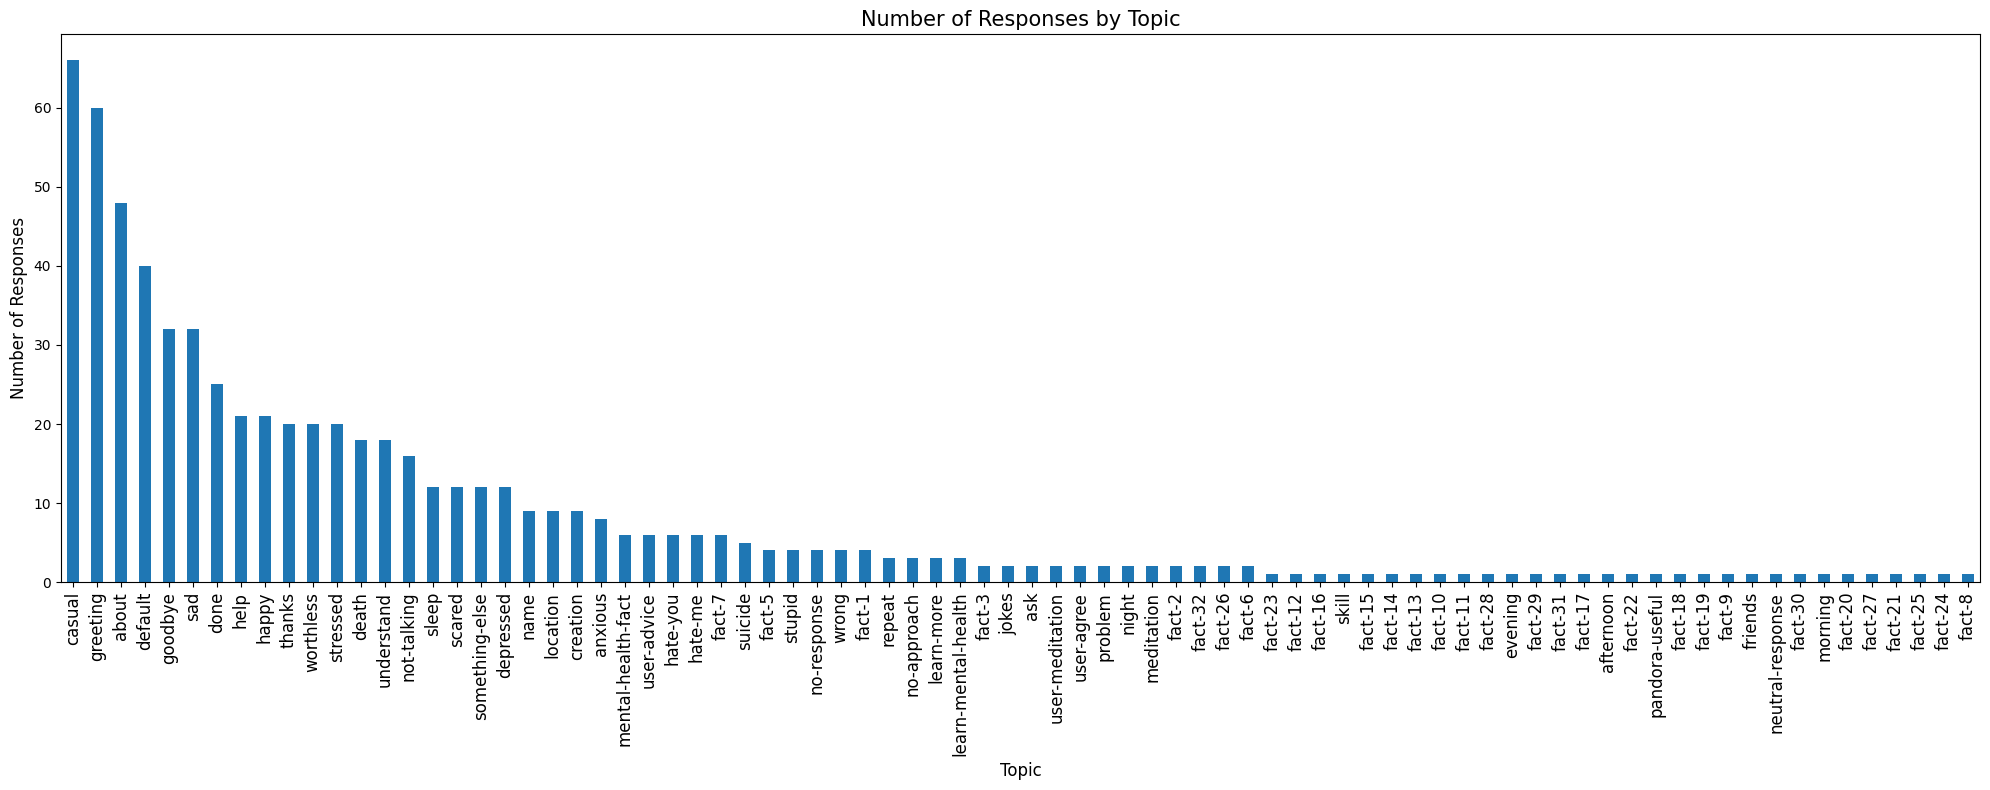

In [20]:
# Distribution of answers by topic
fig, ax = plt.subplots(figsize=(20, 8))
conversational_data.groupby("tag").agg("count")["patterns"].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Responses by Topics", fontsize=15)
ax.set_xlabel("Topic", fontsize=12)
ax.set_ylabel("Number of Responses", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.tight_layout()

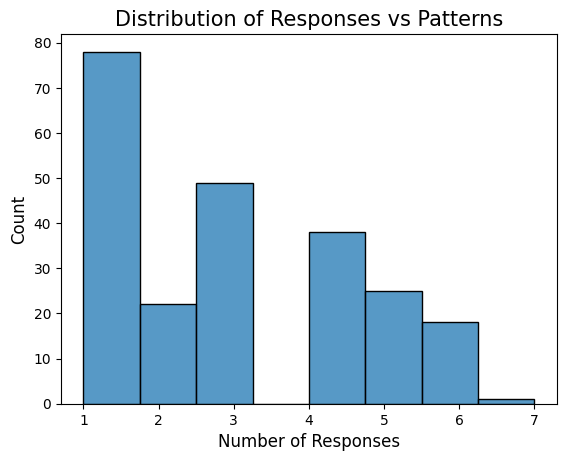

In [40]:
sns.histplot(conversational_data.groupby("patterns").agg("count")["responses"], bins = 8)
plt.title("Distribution of Responses vs Patterns", fontsize=15)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Number of Responses", fontsize=12)
plt.show()

Text(0, 0.5, '')

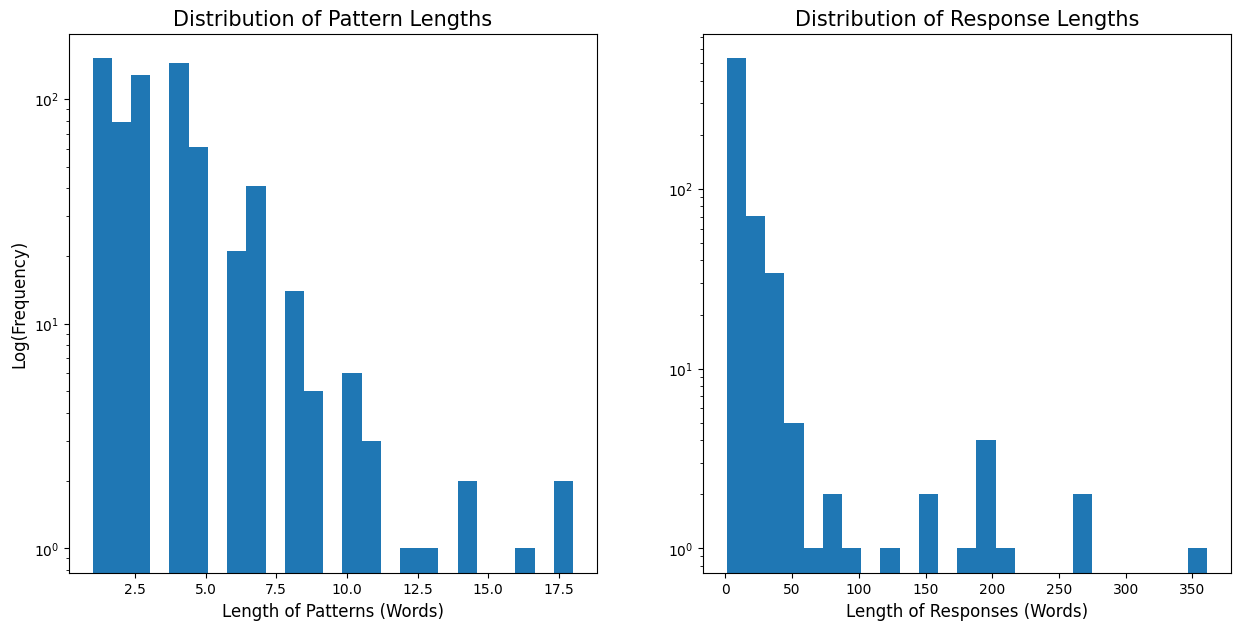

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


# Average Length of Question
conversational_data["patternLength"] = conversational_data["patterns"].apply(lambda x: len(x.split(" ")))
conversational_data["patternLength"].astype(int).plot.hist(bins=25, ax=axs[0], logy=True)
axs[0].set_xlabel("Length of Patterns (Words)", fontsize=12)
axs[0].set_ylabel("Log(Frequency)", fontsize=12)
axs[0].set_title("Distribution of Pattern Lengths", fontsize=15)
#plt.savefig("figures/question_length_hist.png")

# Average Length of response
conversational_data["responseLength"] = conversational_data["responses"].apply(lambda x: len(x.split(" ")))
conversational_data["responseLength"].astype(int).plot.hist(bins=25, ax=axs[1], logy=True)
axs[1].set_xlabel("Length of Responses (Words)", fontsize=12)
axs[1].set_title("Distribution of Response Lengths", fontsize=15)
axs[1].set_ylabel("", fontsize=12)
#plt.savefig("figures/response_length_hist.png")

Text(0, 0.5, '')

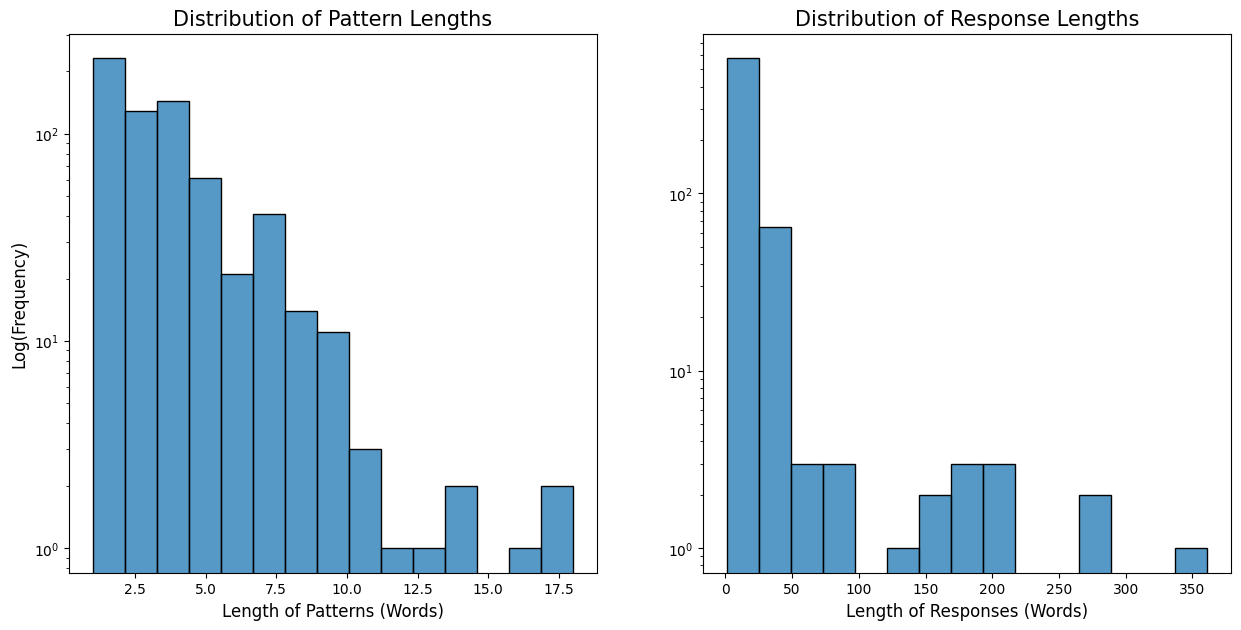

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


# Average Length of Question
conversational_data["patternLength"] = conversational_data["patterns"].apply(lambda x: len(x.split(" ")))
sns.histplot(conversational_data["patternLength"].astype(int), bins = 15, ax = axs[0], log_scale = (False, True))
#conversational_data["patternLength"].astype(int).plot.hist(bins=25, ax=axs[0], logy=True)
axs[0].set_xlabel("Length of Patterns (Words)", fontsize=12)
axs[0].set_ylabel("Log(Frequency)", fontsize=12)
axs[0].set_title("Distribution of Pattern Lengths", fontsize=15)
#plt.savefig("figures/question_length_hist.png")

# Average Length of response
conversational_data["responseLength"] = conversational_data["responses"].apply(lambda x: len(x.split(" ")))
sns.histplot(conversational_data["responseLength"].astype(int), bins = 15, ax = axs[1], log_scale = (False, True))
#conversational_data["responseLength"].astype(int).plot.hist(bins=25, ax=axs[1], logy=True)
axs[1].set_xlabel("Length of Responses (Words)", fontsize=12)
axs[1].set_title("Distribution of Response Lengths", fontsize=15)
axs[1].set_ylabel("", fontsize=12)
#plt.savefig("figures/response_length_hist.png")

In [22]:
counsel_chat_data = pd.read_csv('/content/drive/MyDrive/Master of Science in Machine Learning & AI/Masters_research_project/counselchat-data.csv')
counsel_chat_data.head()

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0


In [3]:
counsel_chat_2020 = pd.read_csv('/content/drive/MyDrive/Master of Science in Machine Learning & AI/Masters_research_project/20200325_counsel_chat.csv')
counsel_chat_2020 = counsel_chat_2020.iloc[:, 1:]
counsel_chat_2020.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


In [ ]:
counsel_chat_2020.shape

(2129, 11)

In [ ]:
counsel_chat_data.shape

(1482, 9)

In [ ]:
1482 + 661 + 2129

4272

In [ ]:
counsel_chat_2020.questionText[0]

"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?"

In [ ]:
counsel_chat_2020.questionTitle[0]

'Can I change my feeling of being worthless to everyone?'

In [ ]:
counsel_chat_2020.answerText[0]

"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. \xa0Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. \xa0They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. \xa0 Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."

In [ ]:
counsel_chat_2020.answerText[1]

'Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone.\xa0Changing our feelings is like changing our thoughts - it\'s hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it\'s place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to "snap out of it" - which is also a thought that carries some self-criticism.\xa0Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the t

In [ ]:
sent = sent.replace("\xa0", "")
sent

"Congrats on your upcoming baby!Its possible that the pregnancy is diminishing your wife's sex drive.From everything you describe about your wife, she sounds to not yet have become comfortable with having a wish for sex.The other side of the sex equation is you and your relative ease with having sex and whether it is for physical release or as an expression of love, some of each.Since you talk with each other honestly then start with a dialogue about what you each would like from sex with each other, from perspective of giving and receiving sex. Hopefully this will open up some new light on your respective feelings.Really, there is a lot to navigate in a conversation about physical and emotional intimacy. If these are not the types of discussions the two of you are used to having, a couples therapist is a good idea so you both become familiar and learn how to more easily articulate some of your respective deep feelings."

In [ ]:
\n, \, (' or ’), 

In [ ]:
\, \xa0, 

In [ ]:
". " ---> "." then "." to ". "

In [ ]:
counsel_chat_2020.questionText[200]

"I've never been able to talk with my parents. My parents are in their sixties while I am a teenager. I love both of them but not their personalities. I feel that they do not take me seriously whenever I talk about a serious event in my life. If my dad doesn't believe me, then my mom goes along with my dad and acts like she doesn't believe me either. I'm a pansexual, but I can't trust my own parents. I've fought depression and won; however, stress and anxiety are killing me. I feel that my friends don't listen to me. I know they have their own problems, which I do my best to help with. But they don't always try to help me with mine, when I really need them. I feel as if my childhood has been taken from me. I feel as if I have no one whom I can trust."

In [ ]:
counsel_chat_2020.questionText[300]

'I\'ve been having this ongoing problem for most of my life now. I am a young adult, and right now, driving and even being a passenger gives me terrible panic attacks and anxiety. I can\'t ride in the backseat or the front seat with the safety belt on. I have to lean the seat back a bit because the pressure on my back terrifies me. I miss so many opportunities to go places with friends and family because of my fears of having a panic attack. My family offers little to no support. They think it\'s fake or "all in my head." It makes me feel guilty and at times depressed to the point where I\'d rather never wake up anymore. I am not self-harming, I just feel meaningless. This constant fear has taken over my thoughts and my life. I was such a happy person. I want my life back. I want to travel with my friends and family again, but I don\'t know how. I\'ve almost given up hope on getting better and just accepting the fact that I\'ll live with this anxiety forever.'

In [ ]:
counsel_chat_2020.answerText[400]

"It sounds like you are having difficulty knowing if people are saying things to you, or if you only thought someone was talking to you, and this is anxiety producing. It's understandable that it could be confusing and/or a bit scary to be unsure if people are speaking to you or not. It's hard to say exactly what is going on from just this description, but if you can work with a competent therapist, you may be able to get more insight into what is happening, get clarity about your social interactions, and develop some ways to deal with the anxiety."

In [ ]:
\r, \n, <p>, &#34, </p>, \xa0, &nbsp;, \, 

In [ ]:
counsel_chat_2020.questionText = counsel_chat_2020.questionText.str.replace("\n", "")
counsel_chat_2020.questionText = counsel_chat_2020.questionText.str.replace("\xa0", " ")
counsel_chat_2020.questionText = counsel_chat_2020.questionText.str.replace("’", "'")
counsel_chat_2020.answerText = counsel_chat_2020.answerText.str.replace("\n", "")
counsel_chat_2020.answerText = counsel_chat_2020.answerText.str.replace("\xa0", " ")
counsel_chat_2020.answerText = counsel_chat_2020.answerText.str.replace("’", "'")

In [ ]:
df["Date"] = df["Date"].str.replace("\s:00", "")

In [ ]:
data1 = pd.DataFrame()
data1[['tag', 'query', 'response']] = conversational_data2[['tag', 'patterns', 'responses']]
data1.head()

,tag,query,response
0,greeting,Hi,Hello there. Tell me how are you feeling today?
1,greeting,Hi,Hi there. What brings you here today?
2,greeting,Hi,Hi there. How are you feeling today?
3,greeting,Hi,Great to see you. How do you feel currently?
4,greeting,Hi,Hello there. Glad to see you're back. What's g...


In [ ]:
data1.shape

(661, 3)

In [ ]:
data2 = pd.DataFrame()
data2[['tag', 'query', 'response']] = counsel_chat_2020[['topic', 'questionText', 'answerText']]
data2.head()

,tag,query,response
0,depression,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,depression,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,depression,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,depression,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,depression,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [ ]:
data2.shape

(2129, 3)

In [ ]:
final_data = pd.concat([data1, data2], axis = 0, ignore_index = True)
final_data.tail()

,tag,query,response
2785,counseling-fundamentals,"After first meeting the client, what is the pr...",There are probably no two therapists alike bec...
2786,counseling-fundamentals,"After first meeting the client, what is the pr...","Each counselor may have a different process, s..."
2787,counseling-fundamentals,"After first meeting the client, what is the pr...","After meeting a client, many Counselors will a..."
2788,counseling-fundamentals,"After first meeting the client, what is the pr...",A good therapist will discuss what brought you...
2789,counseling-fundamentals,"After first meeting the client, what is the pr...",Great question which I imagine many other peop...


In [ ]:
final_data.shape

(2790, 3)

In [ ]:
final_data.to_csv("/content/drive/MyDrive/Master of Science in Machine Learning & AI/Masters_research_project/mental_health_assessment_data.csv",index=False)

(0.0, 30.0)

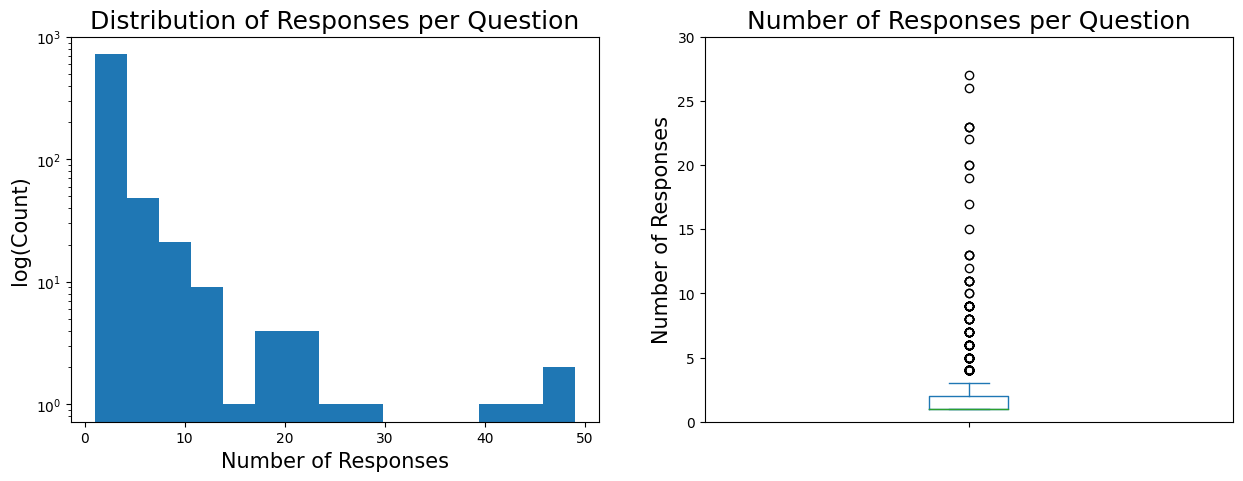

In [10]:
# Distribution of number of responses
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
counsel_chat_2020.groupby("questionID").agg("count")["questionLink"].plot.hist(bins=15, ax=axs[0], logy=True)
axs[0].set_title("Distribution of Responses per Question", fontsize=18)
axs[0].set_ylabel("log(Count)", fontsize=15)
axs[0].set_xlabel("Number of Responses", fontsize=15)


# Number of responses
counsel_chat_2020.groupby("questionID").agg("count")["questionLink"].plot.box(ax=axs[1])
axs[1].set_title("Number of Responses per Question", fontsize=18)
axs[1].set_ylabel("Number of Responses", fontsize=15)
axs[1].set_xticklabels("")
axs[1].set_ylim([0, 30])
#plt.savefig("figures/number_responses.png")

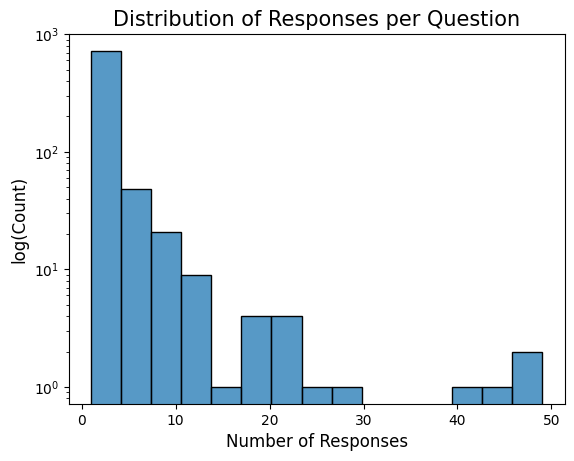

In [4]:
sns.histplot(counsel_chat_2020.groupby("questionID").agg("count")["questionLink"], bins = 15, log_scale = (False, True))
plt.title("Distribution of Responses per Question", fontsize=15)
plt.ylabel("log(Count)", fontsize=12)
plt.xlabel("Number of Responses", fontsize=12)
plt.show()

In [5]:
counsel_chat_data.columns

NameError: ignored

In [23]:
counsel_chat_data.groupby("topics").agg("count")["questionID"].sort_values(ascending=False)

topics
Relationships                              116
Depression                                  68
Anxiety                                     46
Counseling Fundamentals                     39
Relationships,Intimacy                      37
                                          ... 
Depression,Anxiety,Sleep Improvement         1
Relationships,Anxiety,Self-esteem            1
LGBTQ,Intimacy                               1
Relationships,Addiction,Substance Abuse      1
Family Conflict,Social Relationships         1
Name: questionID, Length: 288, dtype: int64

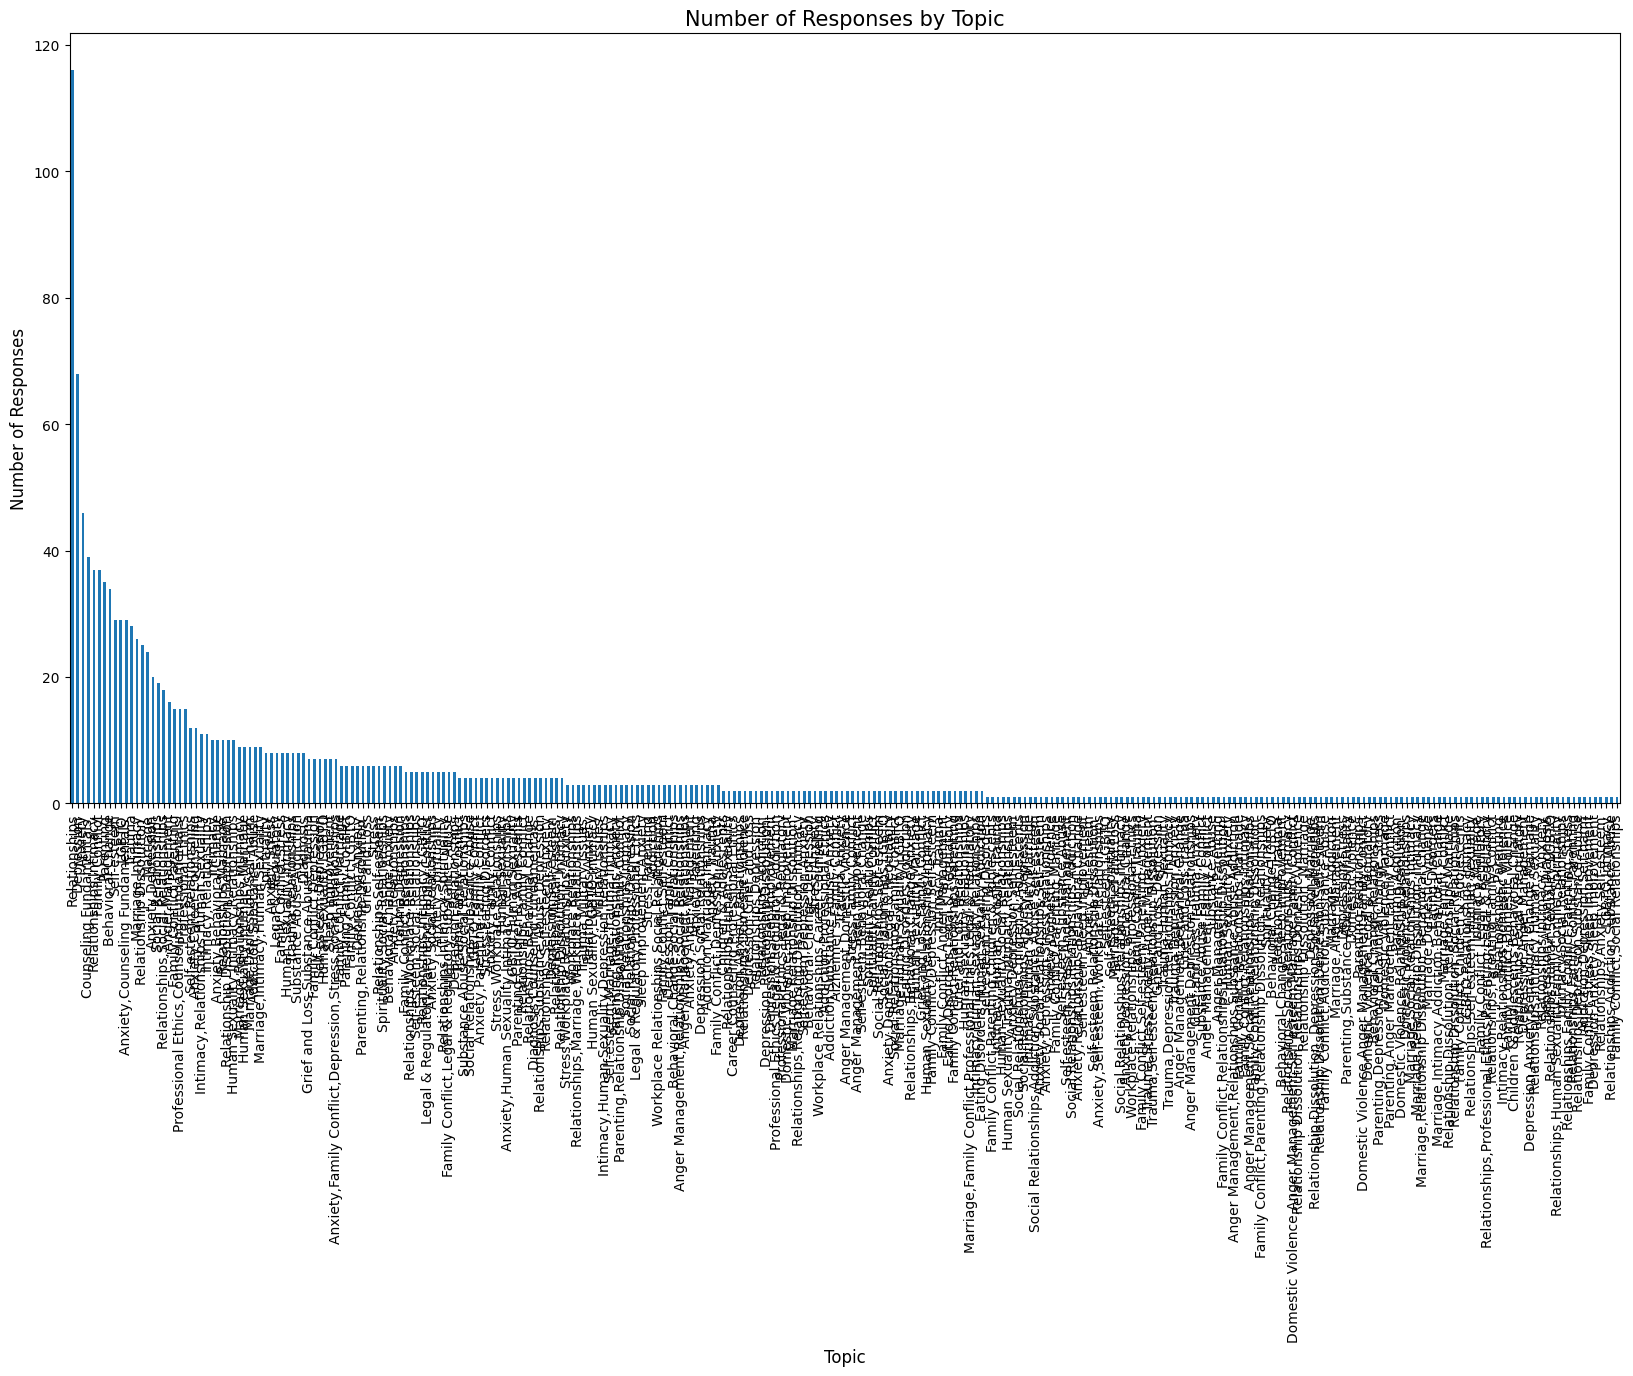

In [29]:
plt.figure(figsize = (20,10))
counsel_chat_data.groupby("topics").agg("count")["questionID"].sort_values(ascending=False).plot.bar()
plt.title("Number of Responses by Topic", fontsize=15)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Number of Responses", fontsize=12)
plt.show()

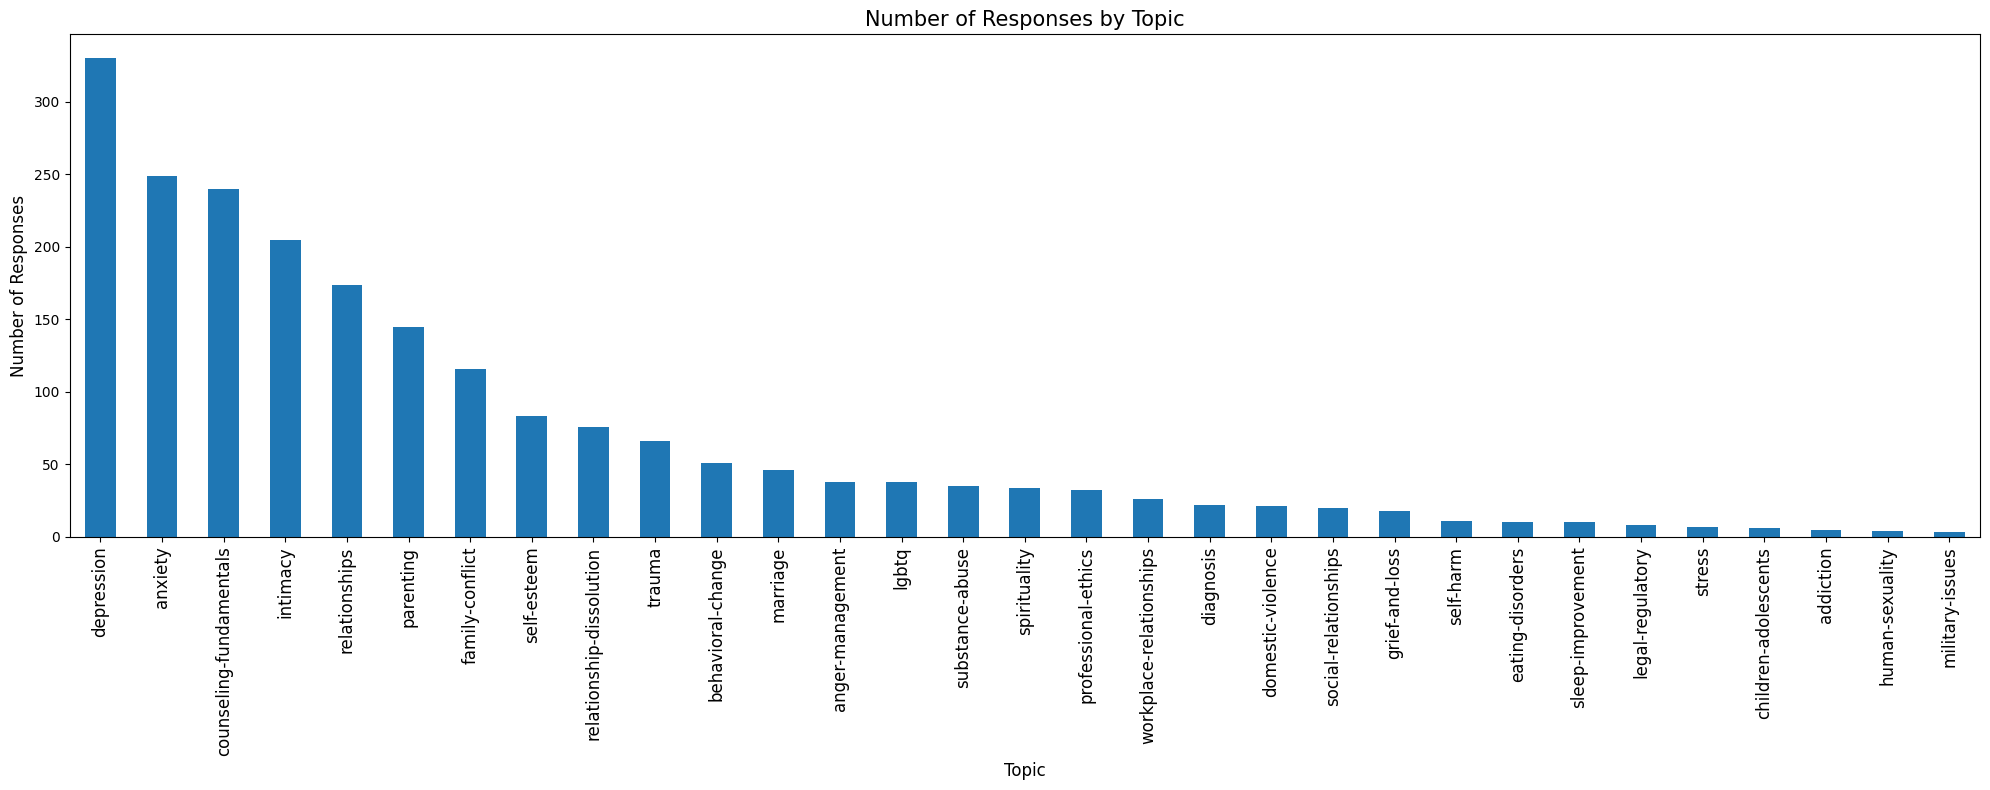

In [6]:
# Distribution of answers by topic
fig, ax = plt.subplots(figsize=(20, 8))
counsel_chat_2020.groupby("topic").agg("count")["questionID"].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title("Number of Responses by Topic", fontsize=15)
ax.set_xlabel("Topic", fontsize=12)
ax.set_ylabel("Number of Responses", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.tight_layout()

Text(0, 0.5, '')

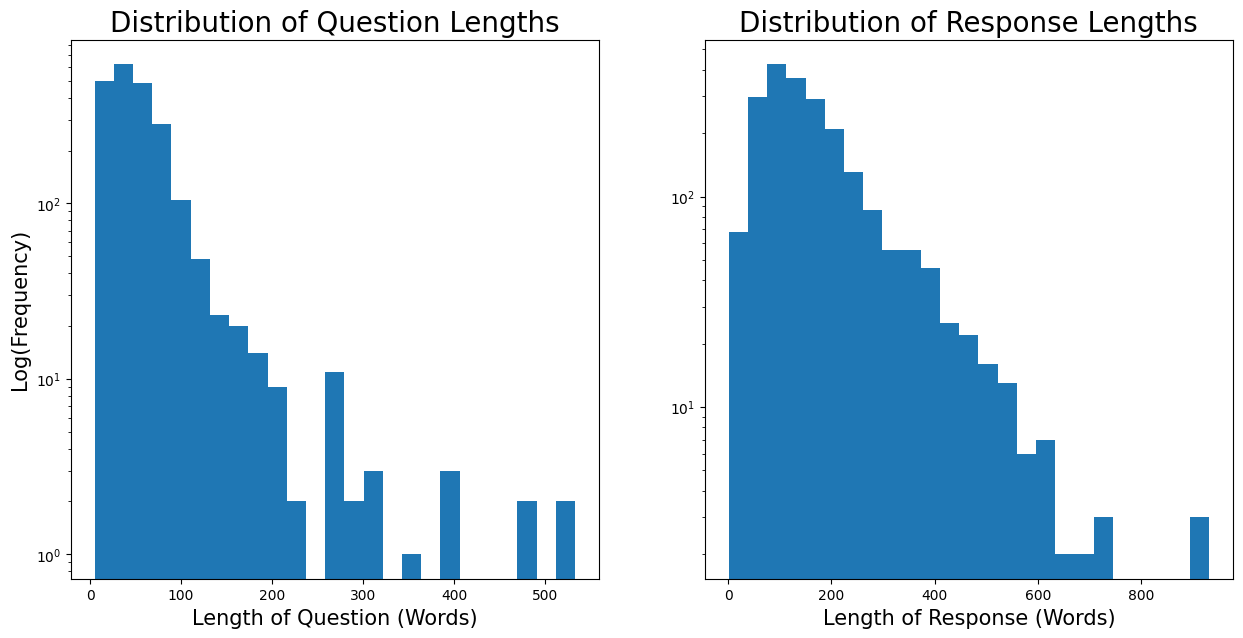

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


# Average Length of Question
counsel_chat_2020["questionLength"] = counsel_chat_2020["questionText"].apply(lambda x: len(x.split(" ")))
counsel_chat_2020["questionLength"].astype(int).plot.hist(bins=25, ax=axs[0], logy=True)
axs[0].set_xlabel("Length of Question (Words)", fontsize=15)
axs[0].set_ylabel("Log(Frequency)", fontsize=15)
axs[0].set_title("Distribution of Question Lengths", fontsize=20)
#plt.savefig("figures/question_length_hist.png")

# Average Length of response
counsel_chat_2020["responseLength"] = counsel_chat_2020["answerText"].apply(lambda x: len(x.split(" ")))
counsel_chat_2020["responseLength"].astype(int).plot.hist(bins=25, ax=axs[1], logy=True)
axs[1].set_xlabel("Length of Response (Words)", fontsize=15)
axs[1].set_title("Distribution of Response Lengths", fontsize=20)
axs[1].set_ylabel("", fontsize=15)
#plt.savefig("figures/response_length_hist.png")

In [3]:
faq_data = pd.read_csv('/content/drive/MyDrive/Master of Science in Machine Learning & AI/Masters_research_project/Mental_Health_FAQ.csv')
faq_data.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [4]:
faq_data.shape

(98, 3)

Ã¢â‚¬â„¢s
â€™


In [5]:
faq_data.Answers[0]

'Mental illnesses are health conditions that disrupt a personâ€™s thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a personâ€™s character, intelligence, or willpower. Just as diabetes is a disorder of the pancreas, mental illness is a medical condition due to the brainâ€™s biology.\nSimilarly to how one would treat diabetes with medication and i

In [ ]:
â€™, ?\n, .\n, .\\n, \n, space\n

In [14]:
faq_data.Answers[3]

'Symptoms of mental health disorders vary depending on the type and severity of the condition. The following is a list of general symptoms that may suggest a mental health disorder, particularly when multiple symptoms are expressed at once.\nIn adults:\nConfused thinking\nLong-lasting sadness or irritability\nExtreme highs and lows in mood\nExcessive fear, worrying, or anxiety\nSocial withdrawal\nDramatic changes in eating or sleeping habits\nStrong feelings of anger\nDelusions or hallucinations (seeing or hearing things that are not really there)\nIncreasing inability to cope with daily problems and activities\nThoughts of suicide\nDenial of obvious problems\nMany unexplained physical problems\nAbuse of drugs and/or alcohol\n  In older children and pre-teens:\nAbuse of drugs and/or alcohol\nInability to cope with daily problems and activities\nChanges in sleeping and/or eating habits\nExcessive complaints of physical problems\nDefying authority, skipping school, stealing, or damaging 

In [12]:
faq_data.Answers[8]

'Since beginning treatment is a big step for individuals and families, it can be very overwhelming. It is important to be as involved and engaged in the treatment process as possible. Some questions you will need to have answered include:\nWhat is known about the cause of this particular illness?\nAre there other diagnoses where these symptoms are common?\nDo you normally include a physical or neurological examination?\nAre there any additional tests or exams that you would recommend at this point?\nWould you advise an independent opinion from another psychiatrist at this point?\nWhat program of treatment is the most helpful with this diagnosis?\nWill this program involve services by other specialists? If so, who will be responsible for coordinating these services?\nWhat do you see as the familyâ€™s role in this program of treatment?\nHow much access will the family have to the individuals who are providing the treatment?\nWhat medications are generally used with this diagnosis?\nHow m

In [8]:
faq_data.Answers[15]

'Some pharmaceutical companies offer prescription assistance programs to individuals and families with financial needs, while others offer special drug discount cards. These programs typically require a doctor’s consent and proof of your financial status. They may also require that you have either no health insurance or no prescription drug benefit through your health insurance.\\nIn addition, there are prescription programs you might qualify for. Visit Healthfinder.gov to learn more.'

In [18]:
faq_data.Answers[88]

'Positive and negative symptoms are medical terms for two groups of symptoms in schizophrenia. \n Positive symptoms add. Positive symptoms include hallucinations (sensations that aren’t real), delusions (beliefs that can’t be real), and repetitive movements that are hard to control. \n Negative symptoms take away. Negative symptoms include the inability to show emotions, apathy, difficulties talking, and withdrawing from social situations and relationships. \n There is also a third group of symptoms, usually called cognitive symptoms. This includes anything related to thinking, such as disorganized thoughts, memory problems, and difficulties with focus and attention.'

Text(0, 0.5, '')

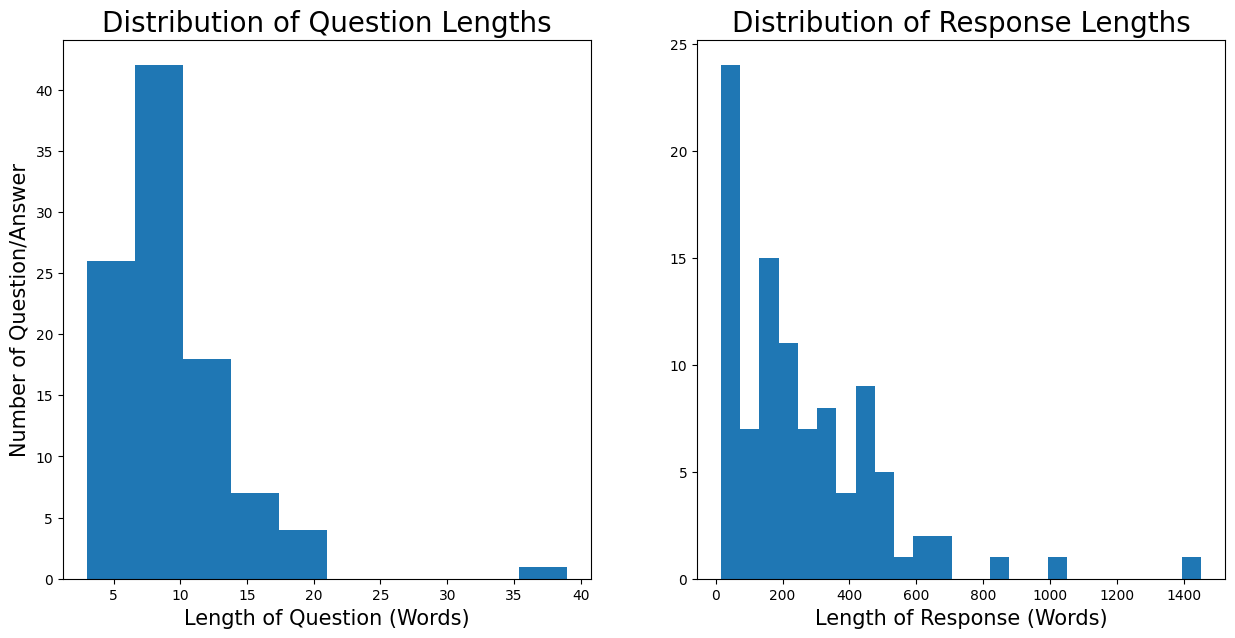

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


# Average Length of Question
faq_data["questionLength"] = faq_data["Questions"].apply(lambda x: len(x.split(" ")))
faq_data["questionLength"].astype(int).plot.hist(bins=10, ax=axs[0], logy=False)
axs[0].set_xlabel("Length of Question (Words)", fontsize=15)
axs[0].set_ylabel("Number of Question/Answer", fontsize=15)
axs[0].set_title("Distribution of Question Lengths", fontsize=20)
#plt.savefig("figures/question_length_hist.png")

# Average Length of response
faq_data["responseLength"] = faq_data["Answers"].apply(lambda x: len(x.split(" ")))
faq_data["responseLength"].astype(int).plot.hist(bins=25, ax=axs[1], logy=False)
axs[1].set_xlabel("Length of Response (Words)", fontsize=15)
axs[1].set_title("Distribution of Response Lengths", fontsize=20)
axs[1].set_ylabel("", fontsize=15)
#plt.savefig("figures/response_length_hist.png")